# Assessment 1: Predict Bike-Sharing need in Metropolitan Area

Programming Language: R 4.0.2 in Jupyter Notebook

R Libraries used:

In [1]:
library(psych)
library(ggplot2)
library(gridExtra)
library(ggplot2)
library(gridExtra)
library(glmnet)
library(leaps)
library(corrplot)
library(caret)
library(e1071)
library(car)
library(randomForest)


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: Matrix

Loaded glmnet 4.0-2

corrplot 0.84 loaded

Loading required package: lattice

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:psych':

    logit


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:psych':

    outlier




## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
* [Exploratory Data Analysis](#sec_3)
* [Methodology](#sec_4)
* [Model Development](#sec_5)
* [Results and discussion](#sec_6)
* [Conclusion](#sec_7)
* [References](#sec_8)

### 1. Introduction <a class="anchor" id="sec_1"></a>

This notebook contains the process and results of the data analysis performed on a set of rental bike demand data. The aim of analysis is to bulid statistical learning models which can predict the bike sharing demands and identify the key features that are strongly associated with them. <br>

The second section of the notebook explores the basic contents of a given dataset. It shows a structure of each attibute and brief statistical information of them. <br>

The third section covers the exploratory data analysis to understand the characteristics and distribution of each attibute, and the correlation between them through visual aids. <br>

The fourth section explains the methodology of the models which will be used in this experiment. <br>  

The fifth section is related to model development which is about how to derive the models used in the experiment, such as the method used to select model parameters. <br>

The sixth secton discusses the results derived from the previous model development section.It will look at the pros and cons of each model and the important predictors extracted from those models. <br>

Lastly, in the last section, the key findings of this experiment will be elaborated.  <br>

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

There are two datasets related to this project. The one is a train dataset which will be used to train a model for predicting the bike sharing demands, and the other one is a test dataset which will be used to test the model built on the train dataset. Thus, in this section, only the train dataset will be used for data exploration. 

In [2]:
# Read the train and test dataset from a csv file
train <- read.csv("train.csv")
test <- read.csv("test.csv")

In [3]:
# Display the dimensions
cat(dim(train)[1], "records", "*", dim(train)[2],"variables \n\n")

# Display the structure
cat("The structure is :\n\n")
str(train)

# Inspect the first few records
cat("\n The first few records in the dataset are:")
head(train)

7008 records * 14 variables 

The structure is :

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : chr  "13/3/18" "15/3/18" "29/11/18" "4/4/18" ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr  "Spring" "Spring" "Autumn" "Spring" ...
 $ Holiday              : chr  "No Holiday" "No Holiday" "N

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


As shown above, the format of the date variable seems a bit hard to understand at a glance. Thus, the datatype and format of it will be modified.

In [4]:
# Change the datatype and format of Date
train$Date <- as.Date(train$Date,format = "%y/%m/%d")
test$Date <- as.Date(test$Date,format = "%y/%m/%d")

To examine the relationship between our target variable (Rented.Bike.Count) and date information in more detail, the day of the week will be exracted from the Date variable and added into a new column.

In [5]:
# Add a column representing day of the week of each record
train$Day <- as.factor(weekdays(train$Date))
test$Day <- as.factor(weekdays(test$Date))

In addition, for the categorical variables, the data types of them will be converted from character to factor.

In [6]:
# convert the datatype: character to factor 
train$Seasons <- as.factor(train$Seasons)
train$Holiday <- as.factor(train$Holiday)
train$Functioning.Day <- as.factor(train$Functioning.Day)

test$Seasons <- as.factor(test$Seasons)
test$Holiday <- as.factor(test$Holiday)
test$Functioning.Day <- as.factor(test$Functioning.Day)

In [7]:
# Statistical summary
cat("basic statistics for each attribute are: ")
summary(train)

cat("The numbers of unique values for each attribute are:")
apply(train,2,function(x) length(unique(x)))

basic statistics for each attribute are: 

      Date            Rented.Bike.Count      Hour        Temperature    
 Min.   :2001-01-18   Min.   :   0.0    Min.   : 0.00   Min.   :-17.50  
 1st Qu.:2008-10-18   1st Qu.: 188.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Median :2016-03-18   Median : 503.0    Median :11.00   Median : 13.60  
 Mean   :2016-04-12   Mean   : 703.2    Mean   :11.46   Mean   : 12.83  
 3rd Qu.:2023-10-18   3rd Qu.:1063.0    3rd Qu.:17.00   3rd Qu.: 22.50  
 Max.   :2031-12-17   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                                                                        
    Humidity       Wind.speed     Visibility     Dew.point.temperature
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700      
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000      
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029      
 3rd Qu.:74.00   3rd Qu.:2.30   3rd Qu.:2000.0   3rd Qu.: 14.

The numbers of unique values for each attribute are:

Date     Rented.Bike.Count                  Hour 
                  365                  2032                    24 
          Temperature              Humidity            Wind.speed 
                  540                    89                    64 
           Visibility Dew.point.temperature       Solar.Radiation 
                 1714                   547                   341 
             Rainfall              Snowfall               Seasons 
                   58                    51                     4 
              Holiday       Functioning.Day                   Day 
                    2                     2                     7

#### Summary of attributes
* Target variable 
     - Rented.Bike.Count:values range from 0 to 3556. From looking at the first quartile, median and third quartile, there could be many values on the smaller sides. From looking at the 3 quartile and max, it probably has outliers, especially high ones.<br><br>
     
* Features
    - Date: We will keep data beyond 2020
    - Hour: from 0 to 23 
    - Wind.speed: From looking at the 3 quartile and max, it probably has outliers, especially high ones.
    - Visibility: large value scale. 3 quartile = max, large gap between the 1st quartile and min. It can be inferred majority of data will be concentrated toward higher values. <br>
    - Rainfall, Snowfall: 1 quartile ~ 3 quartile : all have zero values. majority of the data is concentrated in a small range.  <br>
    - Holiday: large gap between the number of holidays and no holidays 
    - Functioning.Day: large gap between the number of functioning days and no functioning days.

## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

The categorical and numerical variables will be covered seperately considering their characteristics.

### <li> Categorical Variables

Date and Hour attribute will be explored in this section to extract more underlying information.

#### Investigate distribution of each categorical attribute using bar graphs

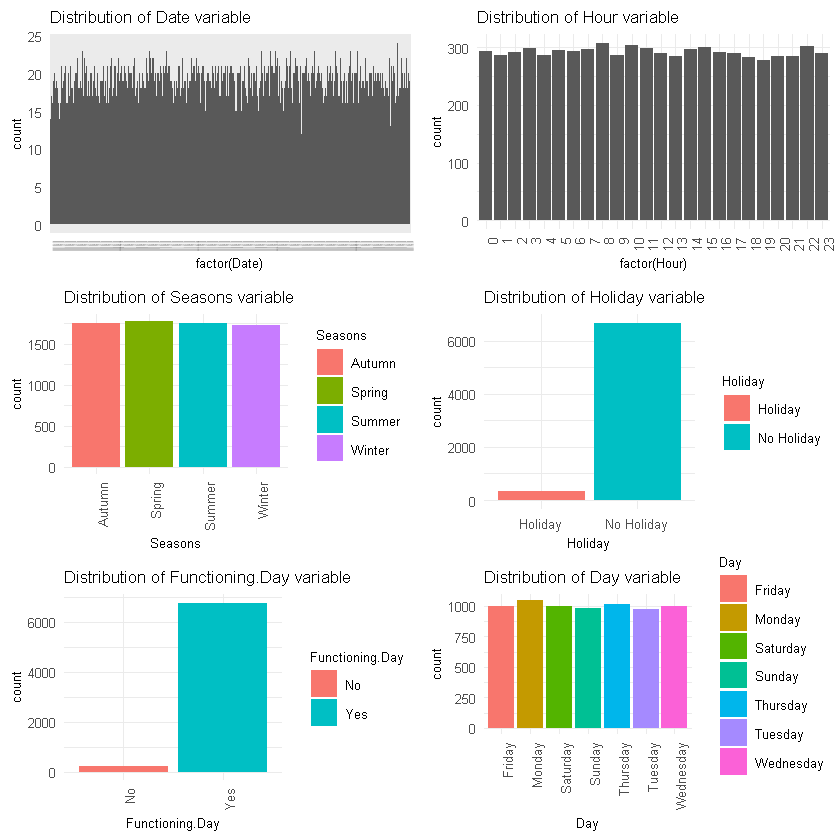

In [8]:
# Check the distribution of each categorical variable 

# Date
bar_Date <-ggplot(data = train, aes(x=factor(Date))) +
            geom_bar(stat="count") +
            theme_minimal() +
            ggtitle("Distribution of Date variable") +
            theme(axis.text.x=element_text(size=1, angle=90, hjust=1)) + 
            theme(axis.text.y=element_text(size=8)) +
            theme(axis.title=element_text(size=8)) +
            theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
            theme(plot.title = element_text(size=10))

# Hour
bar_Hour <-ggplot(data = train, aes(x=factor(Hour))) +
            geom_bar(stat="count") +
            theme_minimal() +
            ggtitle("Distribution of Hour variable") +
            theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
            theme(axis.text.y=element_text(size=8)) +
            theme(axis.title=element_text(size=8)) +
            theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
            theme(plot.title = element_text(size=10)) +
            scale_x_discrete(breaks=seq(0,23,1))


# Seasons
bar_Seasons <-ggplot(data = train, aes(x=Seasons, fill = Seasons)) +
                geom_bar(stat="count") +
                theme_minimal() +
                ggtitle("Distribution of Seasons variable") +  
                theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10)) 
                
# Holiday
bar_Holiday <-ggplot(data = train, aes(x=Holiday, fill = Holiday)) +
                geom_bar(stat="count") +
                theme_minimal() +
                ggtitle("Distribution of Holiday variable") +
                theme(axis.text.x=element_text(size=8)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10))

# Functioning.Day
bar_Functioning.Day <-ggplot(data = train, aes(x=Functioning.Day, fill = Functioning.Day)) +
                        geom_bar(stat="count") +
                        theme_minimal() +
                        ggtitle("Distribution of Functioning.Day variable") +
                        theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                        theme(axis.text.y=element_text(size=8)) +
                        theme(axis.title=element_text(size=8)) +
                        theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                        theme(plot.title = element_text(size=10))    

# Day
bar_Day <-ggplot(data = train, aes(x=Day, fill = Day)) +
            geom_bar(stat="count") +
            theme_minimal() +
            ggtitle("Distribution of Day variable") +
            theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
            theme(axis.text.y=element_text(size=8)) +
            theme(axis.title=element_text(size=8)) +
            theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
            theme(plot.title = element_text(size=10))    

grid.arrange(bar_Date, bar_Hour, bar_Seasons, bar_Holiday, bar_Functioning.Day, bar_Day, ncol=2)

It seems that the distributions of Holiday and Functioning.Day data is highly unbalanced unlike other variables. 
- Holiday < No Holiday
- Functioning Day > No functioning day

#### Investigate the relationship between the target variable  and each category of categorical variables  using boxplots

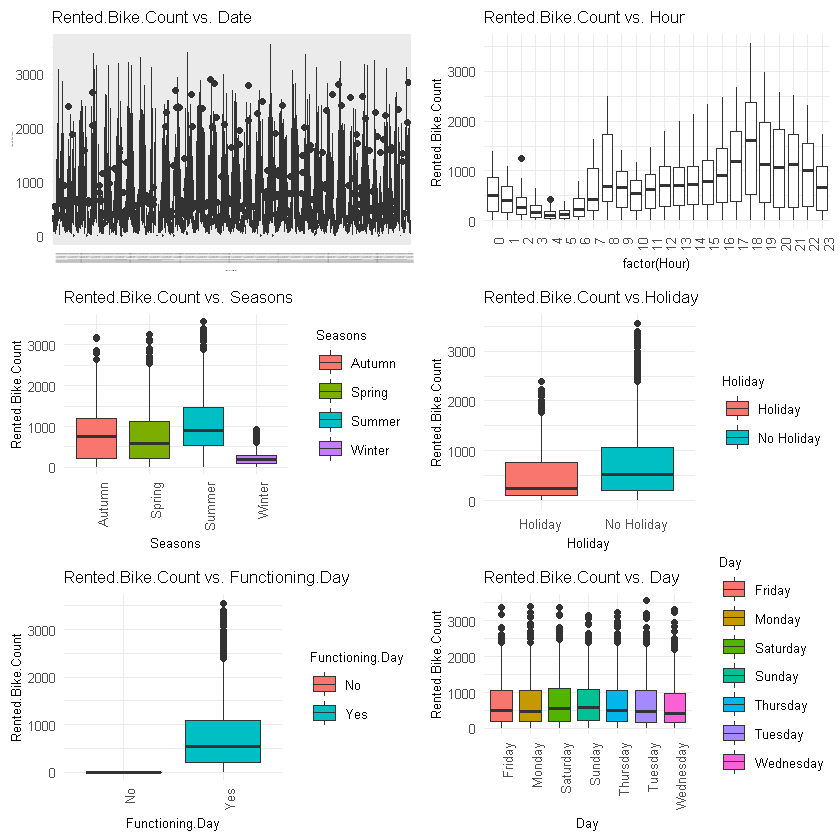

In [9]:
# Check the relationship between the target variable and each category of the categorical variables 

#Hour
box_Date <- ggplot(data= train, aes(x=factor(Date), y=Rented.Bike.Count)) + 
                geom_boxplot() + 
                theme_minimal() +
                ggtitle("Rented.Bike.Count vs. Date") +
                theme(axis.text.x=element_text(size=1, angle=90, hjust=1)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=1)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10)) 

#Hour
box_Hour <- ggplot(data= train, aes(x=factor(Hour), y=Rented.Bike.Count)) + 
                geom_boxplot() + 
                theme_minimal() +
                ggtitle("Rented.Bike.Count vs. Hour") +
                theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10)) 

# Seasons
box_Seasons <- ggplot(data= train, aes(x=Seasons, y=Rented.Bike.Count, fill=Seasons)) + 
                geom_boxplot() + 
                theme_minimal() +
                ggtitle("Rented.Bike.Count vs. Seasons") +
                theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10)) 
# Holiday
box_Holiday <- ggplot(data= train, aes(x=Holiday, y=Rented.Bike.Count, fill=Holiday)) + 
                geom_boxplot() + 
                theme_minimal() +
                ggtitle("Rented.Bike.Count vs.Holiday") +
                theme(axis.text.x=element_text(size=8)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10))

# Functioning.Day
box_Functioning.Day <- ggplot(data= train, aes(x=Functioning.Day, y=Rented.Bike.Count, fill=Functioning.Day)) + 
                        geom_boxplot() + 
                        theme_minimal() +
                        ggtitle("Rented.Bike.Count vs. Functioning.Day") +
                        theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                        theme(axis.text.y=element_text(size=8)) +
                        theme(axis.title=element_text(size=8)) +
                        theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                        theme(plot.title = element_text(size=10))

# Day
box_Day <- ggplot(data= train, aes(x=Day, y=Rented.Bike.Count, fill=Day)) + 
                geom_boxplot() + 
                theme_minimal() +
                ggtitle("Rented.Bike.Count vs. Day") +
                theme(axis.text.x=element_text(size=8, angle=90, hjust=1)) + 
                theme(axis.text.y=element_text(size=8)) +
                theme(axis.title=element_text(size=8)) +
                theme(legend.title=element_text(size=8),legend.text=element_text(size=8)) +
                theme(plot.title = element_text(size=10)) 


grid.arrange(box_Date, box_Hour, box_Seasons, box_Holiday,box_Functioning.Day, box_Day, ncol=2)

- Hour: bike rental rates are higher in the afternoon than in the morning. peak at 16-20,followed by 7-9 o'clock. It seems that there are the majority number of bike rentals during commute time and not many rentals at night.
- Seasons:  high rental rates in summer, low rates in winter <br>
- Holiday: relatively high rental rates in no holidays <br>
- Day: no much difference between days <br>
- Functioning.Day: It seemes it is not be able to rent a bicycle unless it is on a functioning day

Let's have a look at the data when funcioning day has no values.

In [10]:
train[train$Functioning.Day=="No",]

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day,Day
,<date>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
38,2004-10-18,0,22,19.8,60,1.6,2000,11.8,0.00,0.0,0,Autumn,No Holiday,No,Monday
40,2030-09-18,0,11,20.2,63,2.8,1195,12.9,1.25,0.0,0,Autumn,No Holiday,No,Wednesday
69,2030-09-18,0,8,16.2,69,1.1,2000,10.4,0.54,0.0,0,Autumn,No Holiday,No,Wednesday
73,2006-11-18,0,13,16.1,56,1.7,328,7.3,1.54,0.0,0,Autumn,No Holiday,No,Saturday
82,2006-11-18,0,11,13.0,55,1.0,488,4.1,0.84,0.0,0,Autumn,No Holiday,No,Saturday
154,2018-09-18,0,20,22.6,58,1.4,2000,13.9,0.00,0.0,0,Autumn,No Holiday,No,Tuesday
181,2010-05-18,0,12,19.8,49,2.3,1320,8.7,3.17,0.0,0,Spring,No Holiday,No,Tuesday
208,2004-10-18,0,8,13.9,68,0.9,1912,8.0,0.34,0.0,0,Autumn,No Holiday,No,Monday
211,2004-10-18,0,16,25.1,41,1.0,2000,10.9,1.22,0.0,0,Autumn,No Holiday,No,Monday


On no functioning day, all rented bike counts are 0. Therefore, only data with functioning day = yes will be filtered out, and the variable will be deleted as it is no longer needed.

In [11]:
train <- train[,-14]
test <- test[,-14]

### <li> Numerical Variables

#### Investigate the distribution of each numerical attribute using box plots

In [12]:
# Only get numerical variables for exploratory data analysis
Numerical <- train[,!colnames(train) %in% c("Date", "Hour", "Seasons", "Holiday",  "Day")]

The boxplot will be generated for all numerical variables to check the scale of the variables.

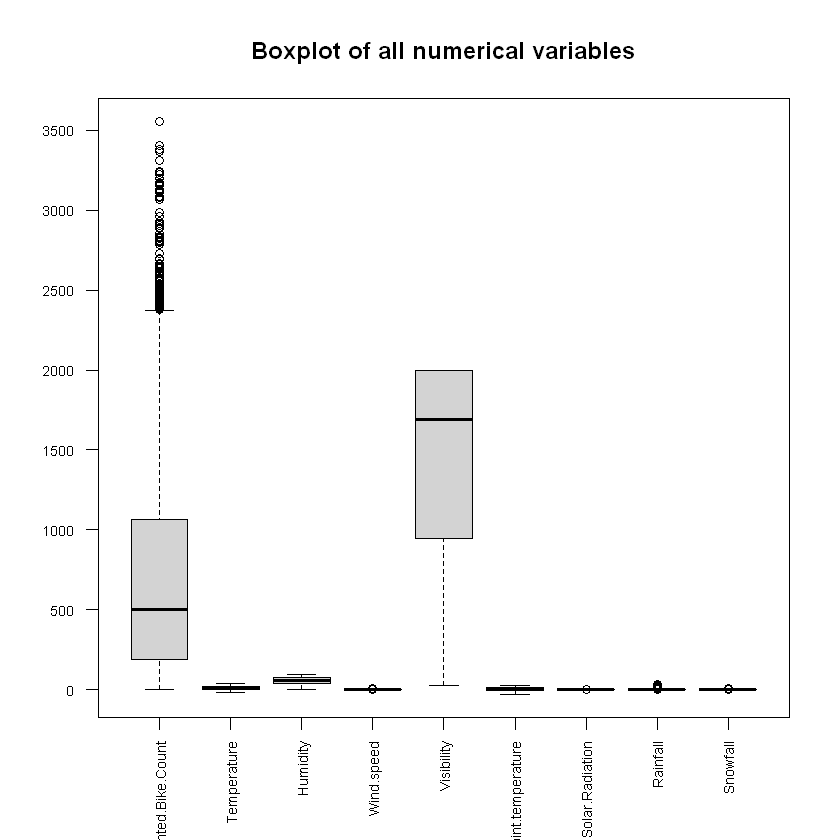

In [13]:
# Boxplot using the same scale
boxplot(Numerical,las=2, cex.axis=0.7, main="Boxplot of all numerical variables")


As shown in the plot above, the "Visibility" attribute and "Rented.Bike.Count" have significantly larger scales than other variables. Since most attributes are overshadowed by these attributes, the scale of them should be adjusted. However, since the "Rented.Bike.Count" is our target variable, it should be considered carefully whether the transformation of it is necessary.

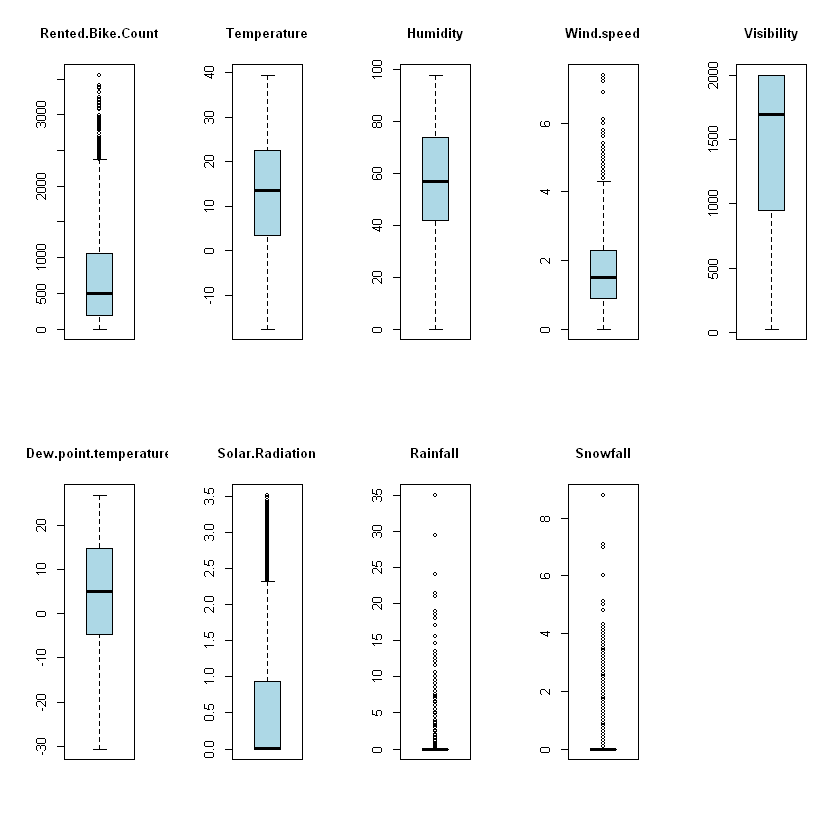

In [14]:
# Boxplot using different scales for each variable
par(mfrow = c(2,5)) # 5 * 2 grid
for (i in 1:(length(Numerical))) {
        boxplot(Numerical[,i], main = names(Numerical[i]), type="l", col = 'lightblue', cex.main=1) 
}

From the boxplots, it can be inferred...
* left skewed distribution: Visibility <br>
* Right skewed distribution: Rented.Bike.Count, Wind.speed, Solar.Radiation, Rainfall, Snowfall. All of these attributes could have many outliers. In particular, Rainfall and Snowfall have very small value ranges(IQR) and a lot of extreme outliers. It means many values of them could be saturated on the smaller side as we mentioned when observing their basic statistics above.

#### Investigate the distribution of each numerical attribute using histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



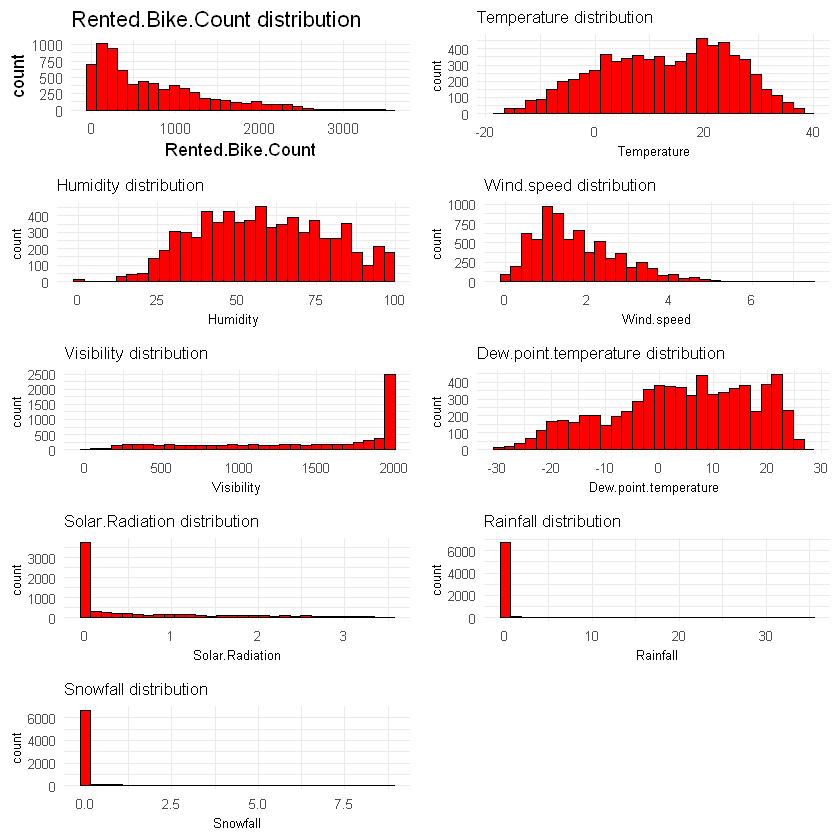

In [15]:
# Draw a histogram to check the distribution of each variable

# Rented.Bike.Count
his_Rented.Bike.Count <- ggplot(data = Numerical, aes(x=Rented.Bike.Count)) +
                            geom_histogram(color = I('black'), fill = "red") + 
                            theme_minimal() +
                            ggtitle('Rented.Bike.Count distribution')

# Temperature
his_Temperature <- ggplot(data = Numerical, aes(x=Temperature)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Temperature distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10))  

# Humidity
his_Humidity <- ggplot(data = Numerical, aes(x=Humidity)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Humidity distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10)) 

# Wind.speed
his_Wind.speed <- ggplot(data = Numerical, aes(x=Wind.speed)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Wind.speed distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10)) 

# Visibility
his_Visibility <- ggplot(data = Numerical, aes(x=Visibility)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Visibility distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10)) 

# Dew.point.temperature
his_Dew.point.temperature <- ggplot(data = Numerical, aes(x=Dew.point.temperature)) +
                                geom_histogram(color = I('black'), fill = "red") + 
                                theme_minimal() +
                                ggtitle('Dew.point.temperature distribution') +
                                theme(axis.text=element_text(size=8)) +
                                theme(axis.title=element_text(size=8)) +
                                theme(plot.title = element_text(size=10)) 

# Solar.Radiation
his_Solar.Radiation <- ggplot(data = Numerical, aes(x=Solar.Radiation)) +
                        geom_histogram(color = I('black'), fill = "red") + 
                        theme_minimal() +
                        ggtitle('Solar.Radiation distribution') +
                        theme(axis.text=element_text(size=8)) +
                        theme(axis.title=element_text(size=8)) +
                        theme(plot.title = element_text(size=10)) 

# Rainfall
his_Rainfall <- ggplot(data = Numerical, aes(x=Rainfall)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Rainfall distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10)) 

# Snowfall
his_Snowfall <- ggplot(data = Numerical, aes(x=Snowfall)) +
                    geom_histogram(color = I('black'), fill = "red") + 
                    theme_minimal() +
                    ggtitle('Snowfall distribution') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=10)) 

grid.arrange(his_Rented.Bike.Count, his_Temperature, his_Humidity, his_Wind.speed, his_Visibility, 
                 his_Dew.point.temperature,his_Solar.Radiation, his_Rainfall,his_Snowfall , ncol = 2)

It seems there is no attribute which is normally distributed.<br>
From the plots, we can derive similar characteristics of each variable observed from the previous statistics and boxplots.<br>
- Left skewed: Visibility. It has a lot of values around 2000 which means that there are many sunny days with good visibility. <br>
- Right skewed: Rented.Bike.Count, Wind.speed, Solar.Radiation, Rainfall, Snowfall<br>
- Wind.speed looks close to the Gaussian distribution, if the influence of the outliers on the right side are removed . <br>
- Solar.Radiation, Rainfall, Snowfall: Distributions of them look similar to each other. The value is mostly concentrated at 0, meaning there are more sunny days with sunlight than rainy and snowy days. <br>
- The distributions of Temperature and Dew.point.temperature also look close to each other.

### <li> Data transformation

The variables that seemed to be skewed or have much larger scales than other attributes will be preprocessed.Firstly, the skewness of each numerical variable will be measured with a skewness coefficient that shows a skewness of data, as shown in the picture below.

![](https://fahimahmad.netlify.app/posts/2020-07-17-skewness-denifination-and-its-importance-in-data-science_files/figure-html/unnamed-chunk-2-1.png)

In [16]:
# skewness coefficient
apply(Numerical,2,skewness)

Rented.Bike.Count           Temperature              Humidity 
            1.1377435            -0.1921143             0.0517204 
           Wind.speed            Visibility Dew.point.temperature 
            0.8927230            -0.7040752            -0.3630097 
      Solar.Radiation              Rainfall              Snowfall 
            1.4993784            14.7917787             8.1442171

From the skewness coefficiens of each variable, there are some attributes which need transformation.
- Highly skewed: Rented.Bike.Count(target variable), Solar.Radiation, Rainfall, Snowfall.
- Moderately skewed: Wind.speed, Visibility <br>

Usually, the square root or log is often used for transforming variables. Although log shows more powerful performance, log can only be used for positive numbers. Also, since the square root can only be used for 0 and positive numbers, we will look at the records of those variables to see whether they meet the condition of each transformation. 

In [17]:
# find the number of values which have positive, zero and negative numbers
cat("##### Rented.Bike.Count ##### \n")
cat("no. of negative values: ", nrow(Numerical[Numerical$Rented.Bike.Count<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Rented.Bike.Count==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Rented.Bike.Count>0,]), "\n\n")

cat("#####Solar.Radiation ##### \n")
cat("no. of negative values: ",nrow(Numerical[Numerical$Solar.Radiation<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Solar.Radiation==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Solar.Radiation>0,]), "\n\n")

cat("##### Rainfall ##### \n")
cat("no. of negative values: ",nrow(Numerical[Numerical$Rainfall<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Rainfall==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Rainfall>0,]), "\n\n")

cat("##### Snowfall ##### \n")
cat("no. of negative values: ",nrow(Numerical[Numerical$Snowfall<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Snowfall==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Snowfall>0,]), "\n\n")

cat("##### Wind.speed ##### \n")
cat("no. of negative values: ", nrow(Numerical[Numerical$Wind.speed<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Wind.speed==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Wind.speed>0,]), "\n\n")

cat("##### Visibility ##### \n")
cat("no. of negative values: ",nrow(Numerical[Numerical$Visibility<0,]), "\n")
cat("no. of zero values: ",nrow(Numerical[Numerical$Visibility==0,]), "\n")
cat("no. of positive values: ",nrow(Numerical[Numerical$Visibility>0,]), "\n\n")

##### Rented.Bike.Count ##### 
no. of negative values:  0 
no. of zero values:  239 
no. of positive values:  6769 

#####Solar.Radiation ##### 
no. of negative values:  0 
no. of zero values:  3440 
no. of positive values:  3568 

##### Rainfall ##### 
no. of negative values:  0 
no. of zero values:  6581 
no. of positive values:  427 

##### Snowfall ##### 
no. of negative values:  0 
no. of zero values:  6664 
no. of positive values:  344 

##### Wind.speed ##### 
no. of negative values:  0 
no. of zero values:  56 
no. of positive values:  6952 

##### Visibility ##### 
no. of negative values:  0 
no. of zero values:  0 
no. of positive values:  7008 



No variable has a negative number as a record. So it seems that square roots can be used for all skewed attributes. Also, in the case of visibility, it seems that log transformation is also possible because there is no zero value. Rented.Bike.Count, Solar.Radiation, Rainfall, Snowfall and Wind.speed will use a square root, and Visibility will try to use both square root and log for transformation. The distribution of each variable after transformation will be plotted to check if the problem of skewness has been resolved.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



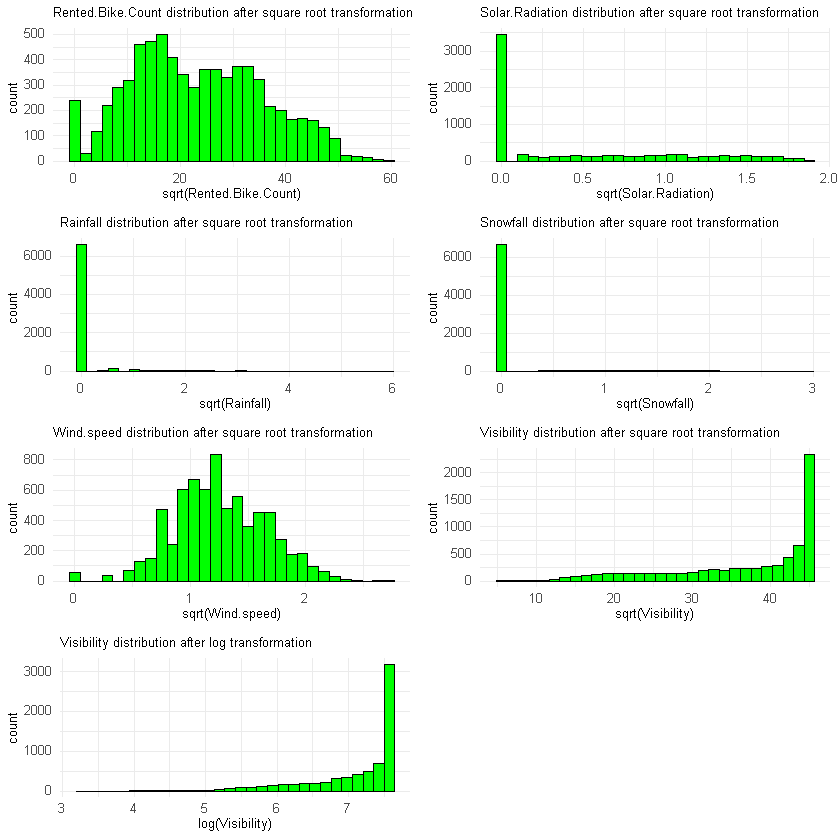

In [18]:
# Rented.Bike.Count
his_Rented.Bike.Count_1 <- ggplot(data = Numerical, aes(x=sqrt(Rented.Bike.Count))) +
                        geom_histogram(color = I('black'), fill = "green") + 
                        theme_minimal() +
                        ggtitle('Rented.Bike.Count distribution after square root transformation') +
                        theme(axis.text=element_text(size=8)) +
                        theme(axis.title=element_text(size=8)) +
                        theme(plot.title = element_text(size=8)) 

# Solar.Radiation
his_Solar.Radiation_1 <- ggplot(data = Numerical, aes(x=sqrt(Solar.Radiation))) +
                        geom_histogram(color = I('black'), fill = "green") + 
                        theme_minimal() +
                        ggtitle('Solar.Radiation distribution after square root transformation') +
                        theme(axis.text=element_text(size=8)) +
                        theme(axis.title=element_text(size=8)) +
                        theme(plot.title = element_text(size=8)) 


# Rainfall
his_Rainfall_1 <- ggplot(data = Numerical, aes(x=sqrt(Rainfall))) +
                    geom_histogram(color = I('black'), fill = "green") + 
                    theme_minimal() +
                    ggtitle('Rainfall distribution after square root transformation') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=8)) 

# Snowfall
his_Snowfall_1 <- ggplot(data = Numerical, aes(x=sqrt(Snowfall))) +
                    geom_histogram(color = I('black'), fill = "green") + 
                    theme_minimal() +
                    ggtitle('Snowfall distribution after square root transformation') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=8)) 

# Wind.speed
his_Wind.speed_1 <- ggplot(data = Numerical, aes(x=sqrt(Wind.speed))) +
                    geom_histogram(color = I('black'), fill = "green") + 
                    theme_minimal() +
                    ggtitle('Wind.speed distribution after square root transformation') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=8)) 

# Visibility
his_Visibility_sqrt <- ggplot(data = Numerical, aes(x=sqrt(Visibility))) +
                    geom_histogram(color = I('black'), fill = "green") + 
                    theme_minimal() +
                    ggtitle('Visibility distribution after square root transformation') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=8)) 

his_Visibility_log <- ggplot(data = Numerical, aes(x=log(Visibility))) +
                    geom_histogram(color = I('black'), fill = "green") + 
                    theme_minimal() +
                    ggtitle('Visibility distribution after log transformation') +
                    theme(axis.text=element_text(size=8)) +
                    theme(axis.title=element_text(size=8)) +
                    theme(plot.title = element_text(size=8)) 

grid.arrange(his_Rented.Bike.Count_1, his_Solar.Radiation_1, his_Rainfall_1, his_Snowfall_1, his_Wind.speed_1, 
             his_Visibility_sqrt, his_Visibility_log, ncol = 2)

In [19]:
cat("The skewness of Rented.Bike.Count after applying square root transformation: ", skewness(sqrt(Numerical$Rented.Bike.Count)),"\n")
cat("The skewness of Solar.Radiation after applying square root transformation: ", skewness(sqrt(Numerical$Solar.Radiation)),"\n")
cat("The skewness of Rainfall after applying square root transformation: ", skewness(sqrt(Numerical$Rainfall)),"\n")
cat("The skewness of Snowfall after applying square root transformation: ", skewness(sqrt(Numerical$Snowfall)),"\n")
cat("The skewness of Wind.speed after applying square root transformation: ", skewness(sqrt(Numerical$Wind.speed)),"\n")
cat("The skewness of Visibility after applying sqrt transformation: ", skewness(sqrt(Numerical$Visibility)),"\n")
cat("The skewness of Visibility after applying log transformation: ", skewness(log(Numerical$Visibility)))

The skewness of Rented.Bike.Count after applying square root transformation:  0.2376234 
The skewness of Solar.Radiation after applying square root transformation:  0.807858 
The skewness of Rainfall after applying square root transformation:  6.709617 
The skewness of Snowfall after applying square root transformation:  5.349563 
The skewness of Wind.speed after applying square root transformation:  0.008721479 
The skewness of Visibility after applying sqrt transformation:  -1.019749 
The skewness of Visibility after applying log transformation:  -1.581136

The distributions of Rented.Bike.Count and Wind.speed are fairly symmertrical after transformation.In particular, Wind.speed seems to be square root normal distributed. 

However, Solar.Radiation, Rainfall, Snowfall and Visibility are still skewed. As we saw earlier, this may be a phenomenon that occurs because the values of the variable are concentrated and saturated in a narrow range. In particular, the zero values of Solar.Radiation, Rainfall, and Snowfall account for almost 50% of their records. By running the code below, it can be checked that the variance of those variables is close to 0. Therefore, when interpreting the values of these variables, it seems better to think whether there is Solar.Radiation, Rainfall or Snowfall, like categorical variables, for example, holiday. Furthermore, it is possible that these variables are not important variables in modeling. However, we will not prematurely remove the variables in this process. Later, in the process of building the model, if each variable is determined to be meaningless according to the p-value or any other statistics judging the significance of variables, it will be removed.

In [20]:
nearZeroVar(train)
colnames(train[c(9,10,11,13)])

[1]  9 10 11 13

[1] "Solar.Radiation" "Rainfall"        "Snowfall"        "Holiday"

The columns after variable transformation will be added and saved in a new data frame. Visibility also worked better with square root transformation than log, so we will use square root transformation for this variable as well.


In [21]:
# transform and save the data

## Train dataset
train_new <- train
train_new$Wind.speed.sqrt <- sqrt(train$Wind.speed) 
train_new$Rented.Bike.Count.sqrt <- sqrt(train$Rented.Bike.Count)
train_new$Visibility.sqrt <- sqrt(train$Visibility)
train_new$Solar.Radiation.sqrt <- sqrt(train$Solar.Radiation)
train_new$Rainfall.sqrt  <- sqrt(train$Rainfall)
train_new$Snowfall.sqrt  <- sqrt(train$Snowfall)


## Test dataset
test_new <- test
test_new$Wind.speed.sqrt <- sqrt(test$Wind.speed) 
test_new$Rented.Bike.Count.sqrt <- sqrt(test$Rented.Bike.Count)
test_new$Visibility.sqrt <- sqrt(test$Visibility)
test_new$Solar.Radiation.sqrt <- sqrt(test$Solar.Radiation)
test_new$Rainfall.sqrt  <- sqrt(test$Rainfall)
test_new$Snowfall.sqrt  <- sqrt(test$Snowfall)


### plot correlation between variables using a scattterplot matrix    

In [22]:
# DIY correlation plot
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
# there's some truth to the quote that modern programming is often stitching together pieces from SO 

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

# usage e.g.:
# pairs(mtcars, upper.panel = panel.cor)

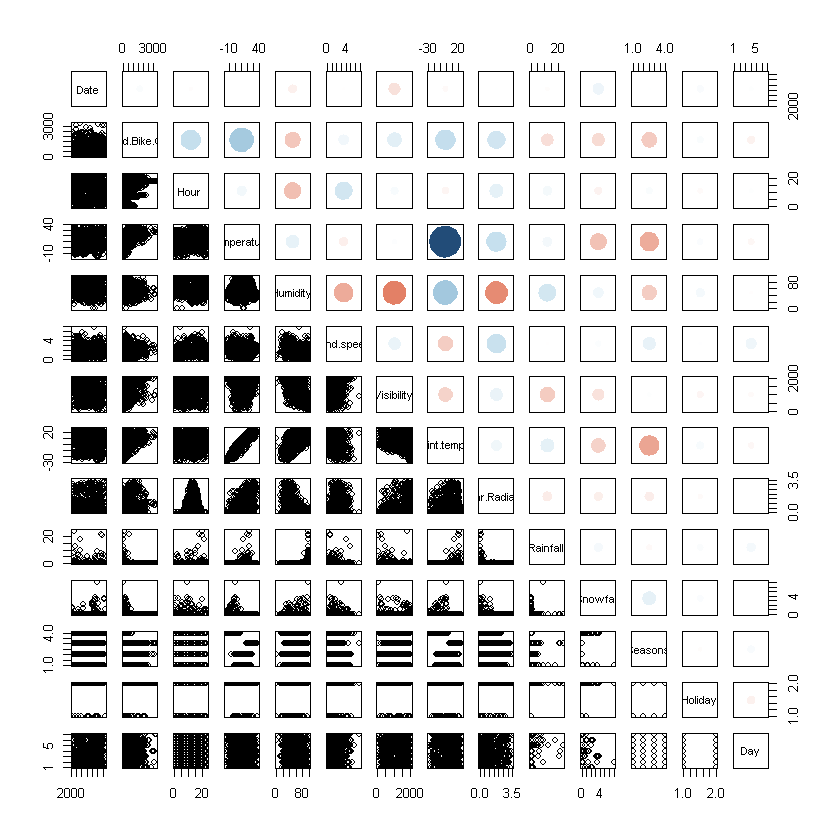

In [23]:
pairs(train[sample.int(nrow(train),1000),], upper.panel=panel.cor)

- Target & Feature <br><br>
    - Rented.Bike.Count (target variable): The response variable seems to have some correlation with most features. The feature which has the strongest correlation with the target is seen as Temperature. Also, the target attribute seems to be correlated to Hour, Dew.point.temperature, Solar.radiation, and Seaseons, to some extent. <br><br>
- Feature & Feature<br><br>
     - The strong correlation between Dew.point.temperature and Temperature is noticeable. Besides, several weather indicators, seasons, and visibility seem to influence each other.



#### Correlation coefficient

In [24]:
# Check the correlation coefficients between numerical variables
Numerical$Hour <- train$Hour
round(cor(Numerical),3)

,Rented.Bike.Count,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Hour
Rented.Bike.Count,1.000,0.541,-0.196,0.126,0.201,0.383,0.263,-0.121,-0.143,0.413
Temperature,0.541,1.000,0.156,-0.033,0.041,0.912,0.353,0.049,-0.217,0.133
Humidity,-0.196,0.156,1.000,-0.343,-0.538,0.535,-0.467,0.233,0.116,-0.239
Wind.speed,0.126,-0.033,-0.343,1.000,0.182,-0.177,0.333,-0.012,-0.015,0.290
Visibility,0.201,0.041,-0.538,0.182,1.000,-0.170,0.147,-0.160,-0.130,0.106
Dew.point.temperature,0.383,0.912,0.535,-0.177,-0.170,1.000,0.091,0.123,-0.147,0.011
Solar.Radiation,0.263,0.353,-0.467,0.333,0.147,0.091,1.000,-0.074,-0.073,0.148
Rainfall,-0.121,0.049,0.233,-0.012,-0.160,0.123,-0.074,1.000,0.015,0.010
Snowfall,-0.143,-0.217,0.116,-0.015,-0.130,-0.147,-0.073,0.015,1.000,-0.034
Hour,0.413,0.133,-0.239,0.290,0.106,0.011,0.148,0.010,-0.034,1.000


According to the figure below, the variables showing moderate or strong correlations are as follows.

![](http://www.uow.edu.au/content/groups/public/@web/@stsv/documents/mm/uow153493.gif)

- Target & Feature <br>
    - Temperature & Rented.Bike.Count(Moderate positive correlation)<br>
- Feature & Feature<br>
    - Dew.point.temperature & Humidity(Moderate positive correlation)<br>
    - Dew.point.temperature & Temperature(Strong positive correlation)<br>
    - Humidity & Visibility (Moderate negative correlation)<br>

It should be noted here that if there is a high correlation between the feautre-feaure, a multicollinearity problem may occur, therefore a feautre selection may be required in the modeling process.

## 4. Methodology<a class="anchor" id="sec_4"></a>

- Purpose of statistical models: Predict the bike rental demands <br>
- Target variable: Continuous variable <br>
   
Considering these characteristics, we can build <br>

- 1. Linear regression model <br>
- 2. Random forest model <br>

Points to consider based on the information from EDA when building those models, <br>
- Categorical variable
    - In the case of Holiday, many values fall into one category. The possibility of overfitting cannot be ruled out.<br><br>
- Numerical variable: <br>
    - Correlation between variables: Among the features which are not the target attribute, there were some variables having correlation with other attributes, which can lead to an issue of multicollinearity. <br>
    

Thus, the issues, that need to be considered and addressed when building models based on the given data set, are overfitting and multicollinearity. Here we will build the models reflecting those points in the following way. <br>

- Ordinary least squares (OLS) regression with a stepwise function for feature selection and VIF(variation inflation factor) calculating function to check the multicollinearity 
- Lasso regression, which applies shrinkage to the basic linear regression model.
- One of the ensemble models which is a random forest regression which is good at dealing with these issues

## 5. Model Development <a class="anchor" id="sec_5"></a>

### <li> Ordinary least squares (OLS) regression 

First, we need to check if transformation is really necessary for each feature and Rented.Bike.Count which is our response  variable. To do this, we will compare the model using the original variables and the model using the variables after transformation to see which one satisfies the assumption of linear regression better.

### Model using original variables


Call:
lm(formula = Rented.Bike.Count ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1395.96  -277.05   -41.63   220.57  2293.90 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.777e+02  1.203e+02   5.634 1.83e-08 ***
Date                   3.470e-06  1.773e-03   0.002 0.998438    
Hour                   2.818e+01  8.806e-01  31.995  < 2e-16 ***
Temperature            1.826e+01  4.334e+00   4.213 2.56e-05 ***
Humidity              -9.800e+00  1.219e+00  -8.042 1.03e-15 ***
Wind.speed             1.630e+01  6.144e+00   2.653 0.008008 ** 
Visibility             3.845e-03  1.195e-02   0.322 0.747691    
Dew.point.temperature  6.423e+00  4.532e+00   1.417 0.156429    
Solar.Radiation       -7.635e+01  9.129e+00  -8.364  < 2e-16 ***
Rainfall              -5.635e+01  4.940e+00 -11.409  < 2e-16 ***
Snowfall               4.208e+01  1.336e+01   3.150 0.001642 ** 
SeasonsSpring         -4.954e+01  1.634e+01 

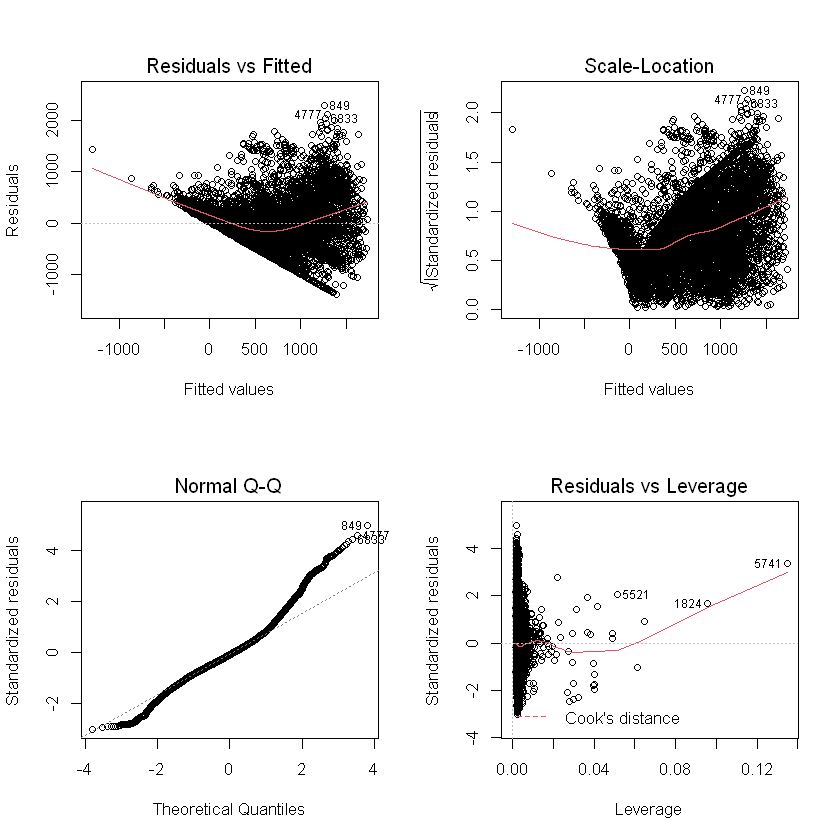

In [25]:
# build a model using original variables
model_original <- lm(Rented.Bike.Count~., data=train)
summary(model_original)
par(mfcol=c(2,2))
plot(model_original)


- Residuals vs. Fitted (Linearity between features and target variable): The residuals are slightly skewed to the right.<br>
- Scale-Location (Homoscedasticity of residuals): also a bit skewed <br>
- Normal Q-Q (Normality of residuals): insufficient to satisfy normality <br>
- Residuals vs. Leverage (outlier, high leverage point, influential obsevation): some observations to be paid attention to.<br><br>
From observing the plots above, it is not enough to say that the statistical assumptions for linear regression are well satisfied. Therefore, we will make another model using the transformed variables created in the EDA process.

### Model using square root transformed variables


Call:
lm(formula = Rented.Bike.Count.sqrt ~ ., data = train_new[, c(-2, 
    -6, -7, -9, -10, -11)])

Residuals:
    Min      1Q  Median      3Q     Max 
-34.788  -4.462   0.122   4.909  30.678 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.975e+01  2.410e+00   8.198 2.88e-16 ***
Date                   8.867e-05  3.334e-05   2.659 0.007847 ** 
Hour                   5.352e-01  1.645e-02  32.524  < 2e-16 ***
Temperature            1.896e-01  8.117e-02   2.336 0.019512 *  
Humidity              -1.555e-01  2.349e-02  -6.617 3.93e-11 ***
Dew.point.temperature  1.845e-01  8.524e-02   2.164 0.030470 *  
SeasonsSpring         -4.183e-01  3.067e-01  -1.364 0.172632    
SeasonsSummer          1.467e+00  3.789e-01   3.871 0.000109 ***
SeasonsWinter         -6.079e+00  4.422e-01 -13.749  < 2e-16 ***
HolidayNo Holiday      3.387e+00  4.873e-01   6.951 3.96e-12 ***
DayMonday             -9.704e-01  3.855e-01  -2.517 0.011841 *  
DaySaturd

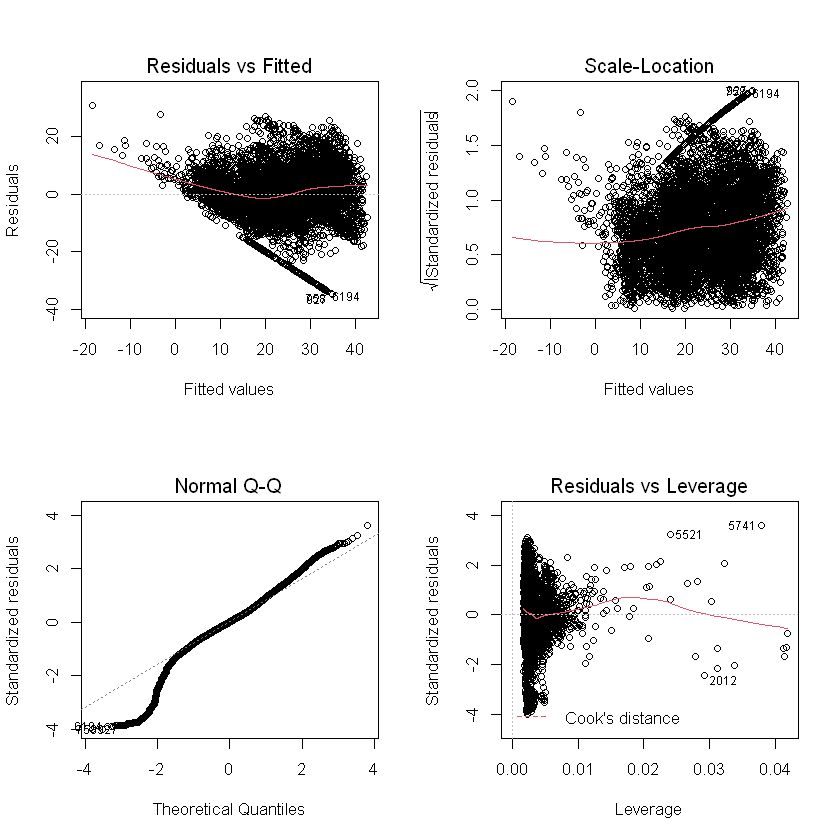

In [26]:
# build a model using square root transformed variables
model_sqrt <- lm(Rented.Bike.Count.sqrt~., data=train_new[,c(-2,-6,-7,-9,-10,-11)])
summary(model_sqrt)
par(mfcol=c(2,2))
plot(model_sqrt)

It seems to be better than the previous model since it has higher adjusted R-squared score which mesures the proportion of the variation in the target variable explained by features based on the number of independent variables for a linear regression model. Also this model has better F-statistic score which is the ratio of the mean regression sum of squares divided by the mean error sum of squares. However, it is still not enough to satisfy the linear regression assumption. In some cases, it may be possible to satisfy the normality assumption by removing influential observations that disproportionately affect the parameters of the model. Thus, We will try to use Cook's distance to find and eliminate those observations.

Warning message in mean.default(outlier, na.rm = T):
"argument is not numeric or logical: returning NA"


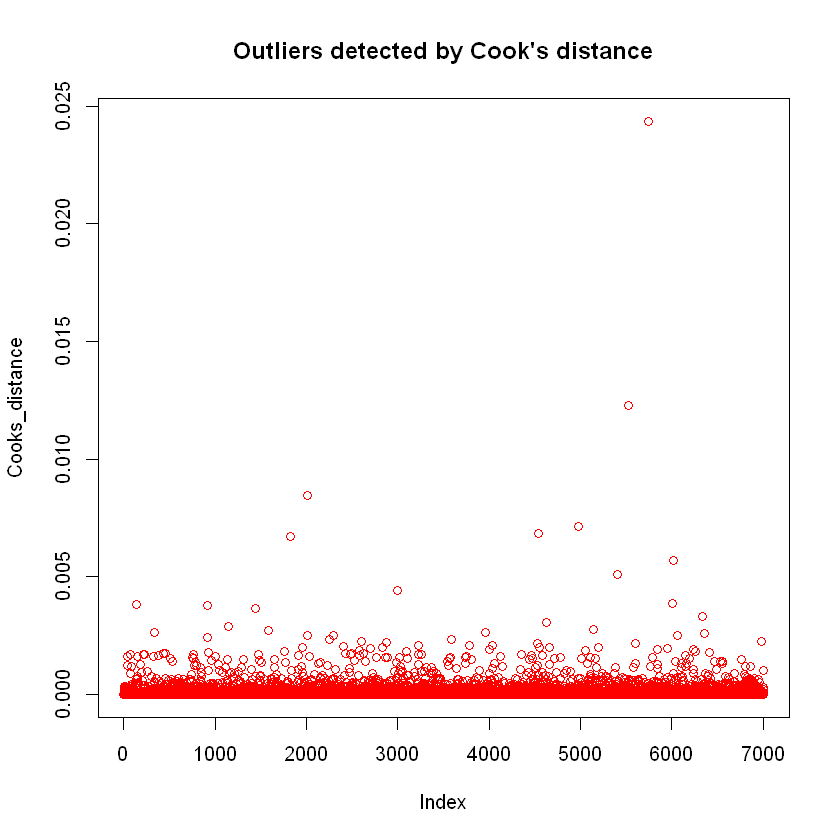

In [27]:
# Detect influential outliers by using Cook's distance
model_outlier <- lm(Rented.Bike.Count.sqrt ~., data=train_new[,c(-2,-6,-7,-9,-10,-11)])
Cooks_distance <- cooks.distance(model_outlier)
plot(Cooks_distance, col="red",main ="Outliers detected by Cook's distance")
abline(h = 4*mean(outlier, na.rm=T), col="red") 

In [28]:
# influential observations indices
outlier_index <- which(Cooks_distance>4*mean(Cooks_distance, na.rm=T))

# Remove influential influential observations
train_cleaned <- train_new[-outlier_index,]

# Check the dimension of dataframe
cat("Dimension of the dataframe before removing influential observations:", dim(train_new))
cat("\nDimension of the dataframe after removing influential observations:", dim(train_cleaned))

Dimension of the dataframe before removing influential observations: 7008 20
Dimension of the dataframe after removing influential observations: 6652 20


Call:
lm(formula = Rented.Bike.Count.sqrt ~ ., data = train_cleaned[, 
    c(-2, -6, -7, -9, -10, -11)])

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6600  -4.2355  -0.3534   4.2248  21.3476 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.445e+01  2.312e+00  14.902  < 2e-16 ***
Date                   3.759e-05  2.675e-05   1.405  0.15998    
Hour                   5.697e-01  1.308e-02  43.551  < 2e-16 ***
Temperature           -2.179e-01  7.677e-02  -2.839  0.00454 ** 
Humidity              -3.126e-01  2.309e-02 -13.534  < 2e-16 ***
Dew.point.temperature  7.362e-01  8.199e-02   8.978  < 2e-16 ***
SeasonsSpring         -2.295e+00  2.491e-01  -9.212  < 2e-16 ***
SeasonsSummer         -2.405e+00  3.081e-01  -7.805 6.88e-15 ***
SeasonsWinter         -7.141e+00  3.521e-01 -20.279  < 2e-16 ***
HolidayNo Holiday      3.619e+00  4.140e-01   8.742  < 2e-16 ***
DayMonday             -5.410e-02  3.071e-01  -0.176  0.86016

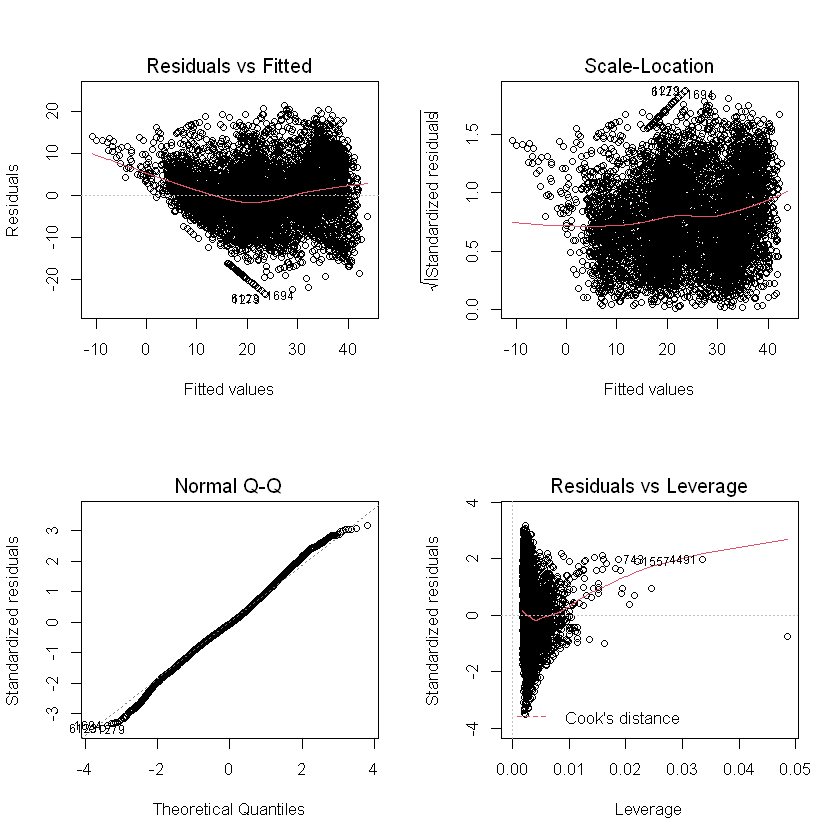

In [29]:
# build a model without influential observations
model_all <- lm(Rented.Bike.Count.sqrt ~ ., data=train_cleaned[,c(-2,-6,-7,-9,-10,-11)])
summary(model_all)

par(mfcol=c(2,2))
plot(model_all)

By removing influential observations, it can be seen that the normality is greatly improved. Moreover, this model has better adjusted R-squared and F-statistic scores than the previous models. Now, considering that the model follows the assumption of linear regression, let's see which variable we should choose to improve the model's performance.

For this, we will use a stepwise function which uses AIC for feature selection.

In [30]:
# Selecting feature by a step() function
summary(step(model_all,direction="both"))

Start:  AIC=25401.41
Rented.Bike.Count.sqrt ~ Date + Hour + Temperature + Humidity + 
    Dew.point.temperature + Seasons + Holiday + Day + Wind.speed.sqrt + 
    Visibility.sqrt + Solar.Radiation.sqrt + Rainfall.sqrt + 
    Snowfall.sqrt

                        Df Sum of Sq    RSS   AIC
- Day                    6       337 301369 25397
- Visibility.sqrt        1         1 301033 25399
- Solar.Radiation.sqrt   1        46 301078 25400
- Date                   1        90 301121 25401
<none>                               301032 25401
- Wind.speed.sqrt        1       129 301161 25402
- Snowfall.sqrt          1       261 301292 25405
- Temperature            1       366 301398 25408
- Holiday                1      3470 304501 25476
- Dew.point.temperature  1      3660 304691 25480
- Humidity               1      8316 309347 25581
- Seasons                3     25878 326910 25944
- Rainfall.sqrt          1     40886 341917 26247
- Hour                   1     86106 387138 27073

Step:  AI


Call:
lm(formula = Rented.Bike.Count.sqrt ~ Date + Hour + Temperature + 
    Humidity + Dew.point.temperature + Seasons + Holiday + Wind.speed.sqrt + 
    Rainfall.sqrt + Snowfall.sqrt, data = train_cleaned[, c(-2, 
    -6, -7, -9, -10, -11)])

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0099  -4.2200  -0.3096   4.1823  21.5384 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.413e+01  2.012e+00  16.964  < 2e-16 ***
Date                   3.785e-05  2.625e-05   1.442  0.14942    
Hour                   5.687e-01  1.302e-02  43.692  < 2e-16 ***
Temperature           -1.998e-01  7.356e-02  -2.717  0.00661 ** 
Humidity              -3.121e-01  2.187e-02 -14.270  < 2e-16 ***
Dew.point.temperature  7.236e-01  7.980e-02   9.068  < 2e-16 ***
SeasonsSpring         -2.270e+00  2.427e-01  -9.353  < 2e-16 ***
SeasonsSummer         -2.447e+00  3.059e-01  -8.000 1.46e-15 ***
SeasonsWinter         -7.111e+00  3.427e-01 -20.748

Through stepwise feature selection, we can check that the followings are important variables: Date+ Hour + Temperature + Humidity + Dew.point.temperature + Seasons + Holiday + Wind.speed.sqrt + Rainfall.sqrt + Snowfall.sqrt

One more thing to consider here is the multicollinearity between variables that are important when interpreting multiple regression results. This multicollinearity can be calculated using a statistic called a variation inflation factor (VIF). If $\sqrt{VIF}$ is 2 or more, it means that there is a multicollinearity problem.

In [31]:
# Check the variable which has a multicollinearity by using vif score
sqrt(vif(model_all))>2

,GVIF,Df,GVIF^(1/(2*Df))
Date,FALSE,FALSE,FALSE
Hour,FALSE,FALSE,FALSE
Temperature,TRUE,FALSE,TRUE
Humidity,TRUE,FALSE,TRUE
Dew.point.temperature,TRUE,FALSE,TRUE
Seasons,TRUE,FALSE,FALSE
Holiday,FALSE,FALSE,FALSE
Day,FALSE,TRUE,FALSE
Wind.speed.sqrt,FALSE,FALSE,FALSE
Visibility.sqrt,FALSE,FALSE,FALSE


Variables that can cause multicollinearity were found to be Temperature, Humidity, and Dew. The correlation between them can be visually confirmed with a scattermatrix plot as below.

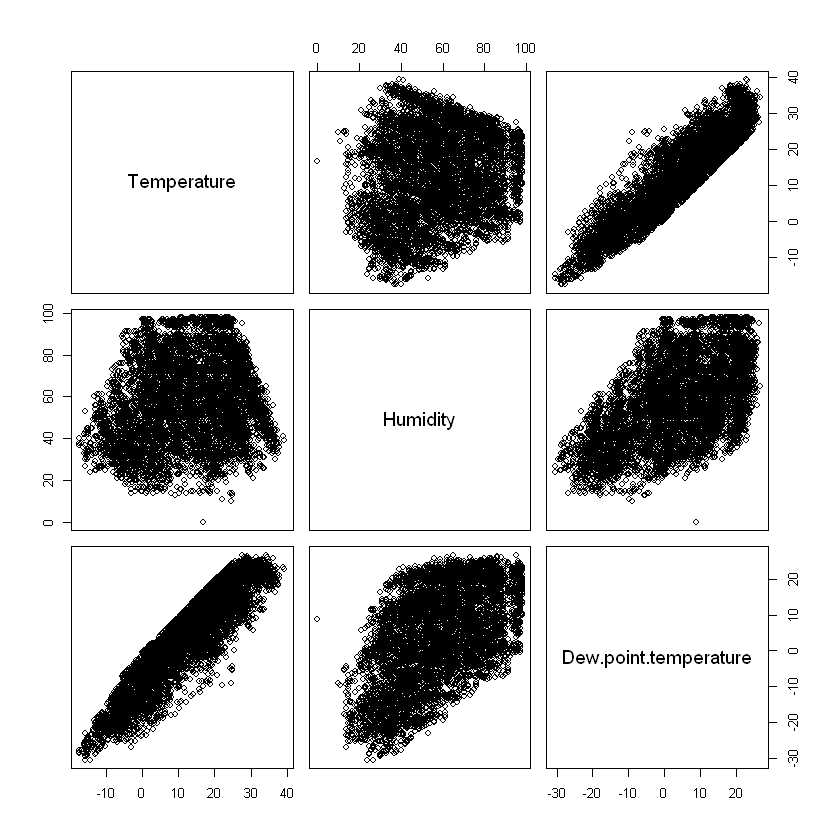

In [32]:
# show the correlation between the variables that can cause multicollinearity
pairs(train_cleaned[,c("Temperature","Humidity","Dew.point.temperature")])

It seems they are correlated to each other, especially Temperature and Dew.point.temperature. Now, we will build the model reflecting the interaction between the variables.

In [33]:
# build a model reflecting the interaction between the variables
model_ols_interaction <- lm(Rented.Bike.Count.sqrt ~
                              Date + Hour + Temperature + Humidity + Dew.point.temperature + Seasons + Holiday + 
                              Wind.speed.sqrt + Rainfall.sqrt + Snowfall.sqrt +
                              Temperature:Dew.point.temperature + Humidity:Dew.point.temperature, 
                              data=train_cleaned[,c(-2,-6,-7,-9,-10,-11)])

summary(model_ols_interaction)


Call:
lm(formula = Rented.Bike.Count.sqrt ~ Date + Hour + Temperature + 
    Humidity + Dew.point.temperature + Seasons + Holiday + Wind.speed.sqrt + 
    Rainfall.sqrt + Snowfall.sqrt + Temperature:Dew.point.temperature + 
    Humidity:Dew.point.temperature, data = train_cleaned[, c(-2, 
    -6, -7, -9, -10, -11)])

Residuals:
     Min       1Q   Median       3Q      Max 
-23.9938  -4.2753  -0.3102   4.2024  20.8856 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.699e+01  2.199e+00  16.824  < 2e-16 ***
Date                               3.147e-05  2.599e-05   1.211 0.226027    
Hour                               5.635e-01  1.290e-02  43.689  < 2e-16 ***
Temperature                       -2.948e-01  7.931e-02  -3.717 0.000204 ***
Humidity                          -3.427e-01  2.471e-02 -13.869  < 2e-16 ***
Dew.point.temperature              9.847e-01  8.468e-02  11.629  < 2e-16 ***
SeasonsSpring          

It can be seen the adjusted R-squared score is improved.

### <li> Lasso Regression

If there is a problem of multicollinearity, Ridge or Lasso regression model can be considered. In this case, will build a Lasso  regression model that has an effect equivalent to feature selection and an effect of preventing overfitting.

In [34]:
# Dataframe to matrix
train_matrix <- model.matrix(Rented.Bike.Count.sqrt~.,data = train_cleaned[,c(-2,-6,-7,-9,-10,-11)])

In [35]:
set.seed(123)

# Fit lasso model
fit.lasso <- glmnet(train_matrix, train_cleaned$Rented.Bike.Count.sqrt, alpha = 1)

# get the minimum lambda by implementing cv
fit.lasso.cv <- cv.glmnet(train_matrix, train_cleaned$Rented.Bike.Count.sqrt, alpha = 1)

lasso_regression <- fit.lasso.cv$lambda.min
lasso_regression

[1] 0.01160947

In [36]:
predict(fit.lasso, s = lasso_regression, type = "coefficients")[1:ncol(train_matrix)+1,]

(Intercept)                  Date                  Hour 
         0.000000e+00          3.437513e-05          5.695855e-01 
          Temperature              Humidity Dew.point.temperature 
         0.000000e+00         -2.490325e-01          4.998190e-01 
        SeasonsSpring         SeasonsSummer         SeasonsWinter 
        -2.243994e+00         -2.234546e+00         -7.026549e+00 
    HolidayNo Holiday             DayMonday           DaySaturday 
         3.612216e+00          0.000000e+00          2.549633e-01 
            DaySunday           DayThursday            DayTuesday 
         2.838858e-01         -1.773121e-02         -2.638206e-01 
         DayWednesday       Wind.speed.sqrt       Visibility.sqrt 
        -3.191516e-01          3.696693e-01          2.950494e-03 
 Solar.Radiation.sqrt         Rainfall.sqrt         Snowfall.sqrt 
         1.154382e-01         -8.541810e+00          6.579180e-01

We can see that the coefficient of the temperature variable is 0. When there is multicollinearity, one of the solutions is to delete one of the variables associated with it, and here the Lasso model has chosen temperature as that variable.

### <li> Random Forest

Now, we will build the random forest model.

In [37]:
# fit random forest
rf.train <- randomForest(Rented.Bike.Count.sqrt~., data=train_cleaned[,c(-2,-6,-7,-9,-10,-11)], ntree=100, mtry=5, importance=T ,na.action=na.omit)

It took much longer time to fit the random forest model than other two linear models.

In [38]:
# summary the results of random forest model
rf.train


Call:
 randomForest(formula = Rented.Bike.Count.sqrt ~ ., data = train_cleaned[,      c(-2, -6, -7, -9, -10, -11)], ntree = 100, mtry = 5, importance = T,      na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 5

          Mean of squared residuals: 14.90153
                    % Var explained: 89.24

In [39]:
summary(rf.train)

                Length Class  Mode     
call               7   -none- call     
type               1   -none- character
predicted       6652   -none- numeric  
mse              100   -none- numeric  
rsq              100   -none- numeric  
oob.times       6652   -none- numeric  
importance        26   -none- numeric  
importanceSD      13   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               6652   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

We can see the mean of squared residuals of this random forest model is around 14 and the percentage of variable explained by the model is arounud 90.

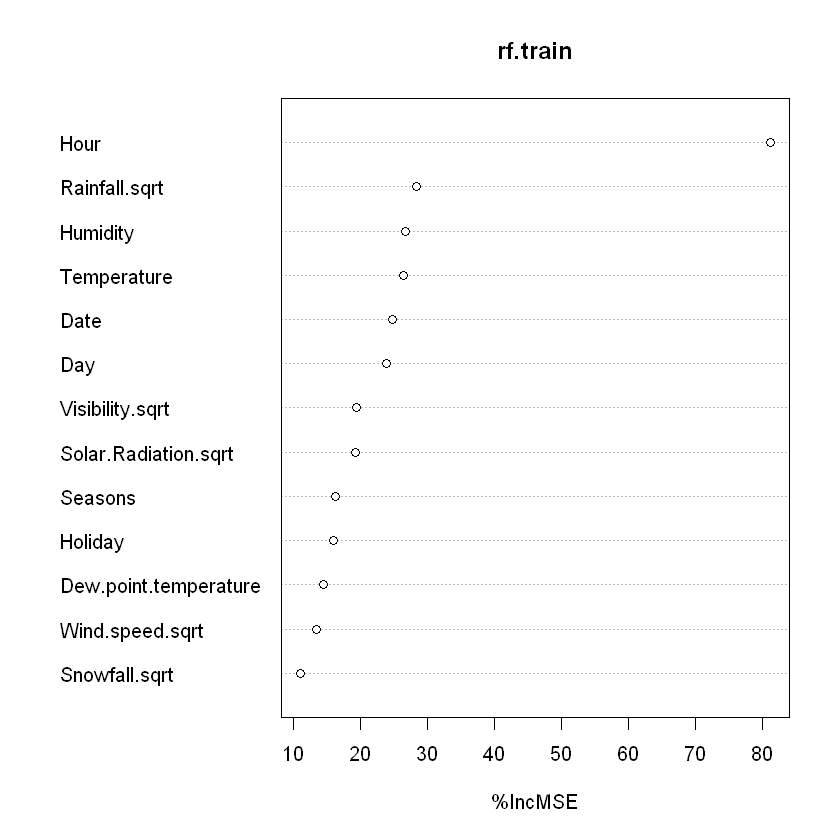

In [40]:
# show the importance variables in order
varImpPlot(rf.train, type=1)

The above plot shows the importance of the variables which were used by training the random forest model in order. We can find hour is the most importance feature, followed by Rain.sqrt, Humidity, Temperature, etc.

## 6. Results and discussion <a class="anchor" id="sec_6"></a>

In this section, we will compare the three models built in the previous sections by using RMSE(root mean squared error): <br>
- Ordinary least squares (OLS) regression
- Lasso regression
- Random Forest for regression

#### <li> Accuracy

First, let's take a look at how similar the models predict values to actual training data.

In [41]:
# create a dataframe to show response variable and predicted results
# To get the exact bike count, square Rented.Bike.Count.sqrt, which was our target variable.
prediction_train <- as.data.frame((train_cleaned[,'Rented.Bike.Count.sqrt'])^2, colname= 'Rented.Bike.Count.sqrt')
colnames(prediction_train)[1] <- 'Rented.Bike.Count'

In [42]:
# Calculate predicted value 
prediction_train$OLS_Regression <- round((predict(model_ols_interaction, train_cleaned[,c(-2,-6,-7,-9,-10,-11)]))^2)
prediction_train$Lasso_Regression <- round((predict(fit.lasso, s = lasso_regression, newx = train_matrix))^2)
prediction_train$Random_Forest <- round((predict(rf.train, newdata=train_cleaned[,c(-2,-6,-7,-9,-10,-11)]))^2)

In [43]:
head(prediction_train)

,Rented.Bike.Count,OLS_Regression,Lasso_Regression,Random_Forest
,<dbl>,<dbl>,"<dbl[,1]>",<dbl>
1,705,1021,991,857
2,289,388,425,247
3,126,458,487,135
4,378,381,401,469
5,236,281,332,249
6,708,890,885,788


Now, we will calculate RMSE of each model on the training dataset for comparing their accuracy.

In [44]:
# Calculate RMSE 
RMSE <- function(x,y) sqrt(mean((y-x)^2, na.rm = T))
rmse_train <- c(RMSE(prediction_train$Rented.Bike.Count, prediction_train$OLS_Regression),
                  RMSE(prediction_train$Rented.Bike.Count, prediction_train$Lasso_Regression),
                  RMSE(prediction_train$Rented.Bike.Count, prediction_train$Random_Forest))

names(rmse_train) <- c("OLS_Regression","Lasso_Regression","Random_Forest")
print(rmse_train)

  OLS_Regression Lasso_Regression    Random_Forest 
       372.25441        379.08900         94.06897 


<br> <br> 
Next, we will use test dataset to check how the models predict the target values well on unseen data.

In [45]:
# Dataframe to matrix
test_matrix <- model.matrix(Rented.Bike.Count.sqrt~.,data = test_new[,c(-2,-6,-7,-9,-10,-11)])

In [46]:
# create a dataframe to show response variable and predicted results
prediction <- as.data.frame((test_new[,'Rented.Bike.Count.sqrt'])^2, colname= 'Rented.Bike.Count.sqrt')
colnames(prediction)[1] <- 'Rented.Bike.Count'

In [47]:
# Calculate predicted value 
prediction$OLS_Regression <- round((predict(model_ols_interaction, test_new[,c(-2,-6,-7,-9,-10,-11)]))^2)
prediction$Lasso_Regression <- round((predict(fit.lasso, s = lasso_regression, newx = test_matrix))^2)
prediction$Random_Forest <- round((predict(rf.train, newdata=test_new[,c(-2,-6,-7,-9,-10,-11)]))^2)

In [48]:
head(prediction)

,Rented.Bike.Count,OLS_Regression,Lasso_Regression,Random_Forest
,<dbl>,<dbl>,"<dbl[,1]>",<dbl>
1,360,248,301,309
2,862,357,311,519
3,323,297,276,302
4,89,39,28,70
5,219,69,55,277
6,479,417,357,408


Now, we will calculate the RMSE of each model on the test data for comparing their test errors.

In [49]:
# Calculate RMSE 
rmse <- c(RMSE(prediction$Rented.Bike.Count, prediction$OLS_Regression),
          RMSE(prediction$Rented.Bike.Count, prediction$Lasso_Regression),
          RMSE(prediction$Rented.Bike.Count, prediction$Random_Forest))

names(rmse) <- c("OLS_Regression","Lasso_Regression","Random_Forest")
print(rmse)

  OLS_Regression Lasso_Regression    Random_Forest 
        437.1502         439.6566         292.9026 


<br> <br>We can see that on both datasets, the random forest model showed the best performace, since its RMSE is lowest. However, it showed the largest gap between its RMSE values between on train and test dataset than other two linear models. This is because the random forest regression is one of the ensemble models that predicts the target value from several different decision trees which make their own dicisions by sampling data from the given train dataset respectively. Thus, the random forest model is less affected by outliers or correlations between variables,and have high accuracy in making a prediction on training data. On the other hand, the two linear regression models showed the similar performance in terms of RMSE, while the OLS seems to work slightly better than the lasso regression model.

#### <li> Important features

We will inspect the important features used by each model to predict the bike rental demands.

In [50]:
# column names except the target variable and feauters before transformation
colnames(train_cleaned[,c(-2,-6,-7,-9,-10,-11,-16)])

[1] "Date"                  "Hour"                  "Temperature"          
 [4] "Humidity"              "Dew.point.temperature" "Seasons"              
 [7] "Holiday"               "Day"                   "Wind.speed.sqrt"      
[10] "Visibility.sqrt"       "Solar.Radiation.sqrt"  "Rainfall.sqrt"        
[13] "Snowfall.sqrt"

The important features of each model can be checked below.<br>

- Ordinary least squares (OLS) regression:
    - at the significance level $\alpha = 0.05$: <br> All features listed above with Temperature:Dew.point.temperature and Humidity:Dew.point.temperature, except Date, Day, Visibility.sqrt, Solar.Radiation (11 features) <br><br>
    
- Lasso Regression:
    - coefficient $\neq$ 0: All features listed above, except Temperature (12 features)
    - Temperature was one of the features which had a correlation with other attributes.<br><br>
    
- Random Forest: 
    - All features listed above (13 features)
    - Importance: Hour > Rain.sqrt > Humidity > Temperature > Date > Day > Visibility.sqrt > Solar.Radiation.sqrt > Seasons > Holidqy > Dew.point.temperature > Wind.speed.sqrt > Snowfall.sqrt <br> <br>

It can be observed that number of variables used by the model is Random Forest > Lasso Regression > OLS Regression in order. This seems to be due to differences in the algorithms of the models. Since the random forest regression can deal with many cases by using a large number of decision trees, it can keep all features when being trained. On the other hand, the lasso regression uses a shrinkage penalty to remove the effect of the relatively insignificant variables. In this experiment, to prevent multicollinearity that increases the variance of the regression coefficient, the lasso regression removed one of the attributes, Temperature, which was correlated with other attributes. On the contrary, the OLS model with a stepwise function removed the features of which the p-value was not small as the significance level. Thereafter, by referring the correlation plot, two features were added manually to this model which can reflect the interaction between the features.  

## 7. Conclusion<a class="anchor" id="sec_7"></a>

The purpose of this project is to build a statistical model which can be used to predict the bike demands based on the several attributes, such as hour, temperature, humidity, seasons and so on. From the data exploration and EDA section, we found that the issues to be paid attention to, when building the models, were (1) overfitting due to skewnesses and imbalance distributions of the numerical and categorical data, and (2) multicollinearity due to strong correlations between features. It is attempted to improve skewnesses of the numerical variables by using square root transformation before building the actual models, however, there were some variables that did not see much of the effect of transformation. Thus, the possibility of feature selection, according to the importance of the variables at the stage of model building, had to be noted. <br>

Thus, for predicting the bike rental demands correctly, three models were built, which were (1) Ordinary least squares (OLS) regression with a stepwise function for feature selection and VIF(variation inflation factor) function to check the multicollinearity, (2) Lasso regression, applying shrinkage to the basic linear regression model and (3) random forest regression. <br>

After training those models on the training dataset and predicting the values of the target variable on both training and testing dataset, the random forest model showed the best performance. It could be because the random forest regression is less sensitive to outliers and multicollinearity than other two models, by using a random sampling technique and using several independent decision trees. However, it took much longer time for the random forest model to be fitted on the training dataset. Thus, depending on which factor is weighted, processing speed or accuracy, either the random forest model or linear regresson models can be selected to do regression jobs for the continuous target variable. On the other hand, the other two regression models showed similar performance in spite of using different method. In general, the OLS regression model is more susceptible to overfitting and multicollinearity than lasso regression model which uses the penalty parameter to prevent these issues. However, it was observed that, through the researcher's manipulation, the modified OLS can show better performance in terms of RMSE than lasso regression. 

## 8. References <a class="anchor" id="sec_8"></a>

https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55 

https://stackoverflow.com/questions/13236158/real-cube-root-of-a-negative-number

https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re

https://stats.stackexchange.com/questions/284280/is-a-skewed-target-variable-bad-for-a-linear-regression-model

https://discuss.analyticsvidhya.com/t/difference-between-r-square-and-adjusted-r-square/264

http://www.nlreg.com/results.htm